In [2]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('/home/sanket-pandey/Downloads/insurance.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
import jovian

<IPython.core.display.Javascript object>

In [12]:
import plotly.express as px

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [47]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [16]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

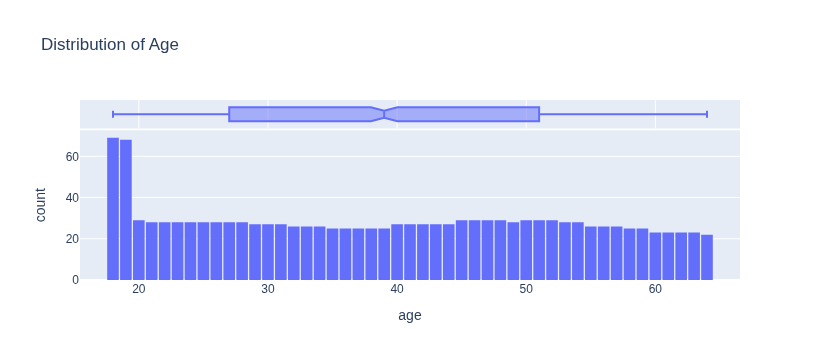

In [18]:
fig = px.histogram(medical_df, x='age', marginal='box', nbins=47, title='Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

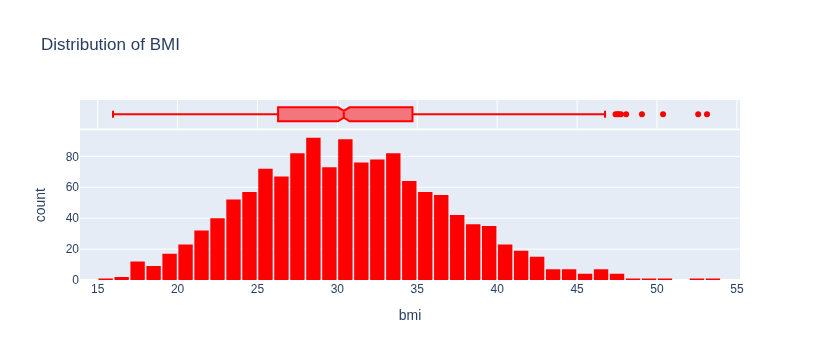

In [20]:
# Body Mass index [BMI]

fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['red'], title='Distribution of BMI')
fig.update_layout(bargap = 0.1)
fig.show()


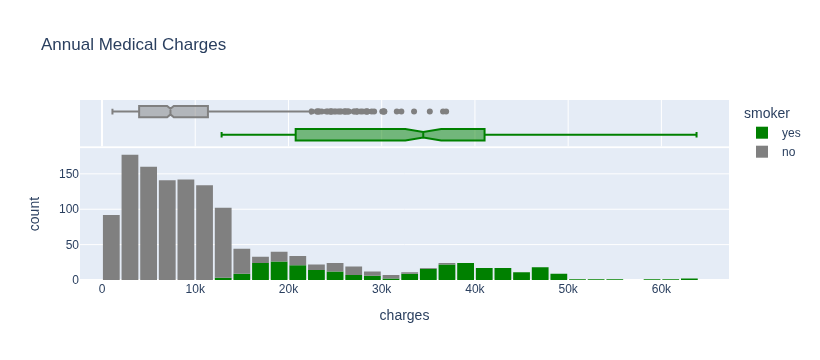

In [22]:
# Charges

fig = px.histogram(medical_df, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green','grey'], title='Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [23]:
# SMOKER

medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

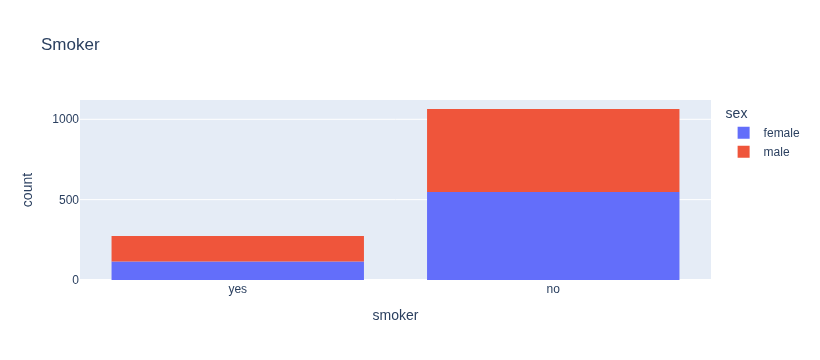

In [24]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

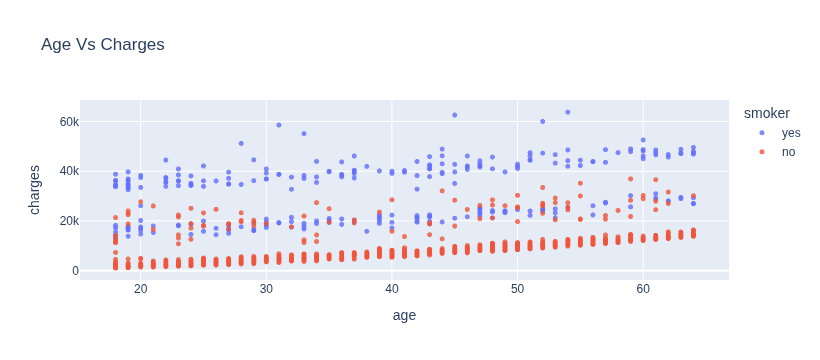

In [28]:
# Age and Charges

fig = px.scatter(medical_df, x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='Age Vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

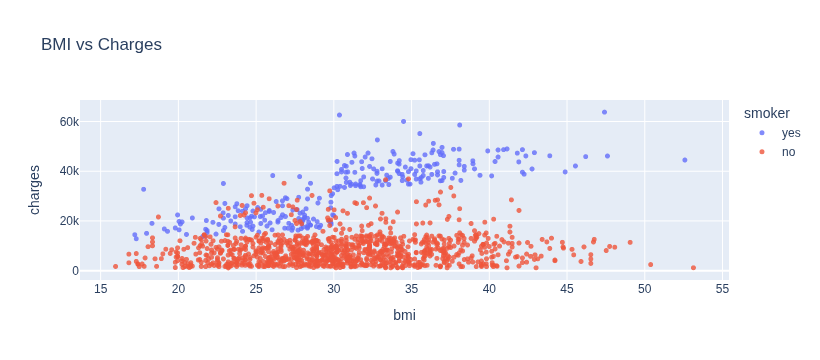

In [29]:
# BMI and Charges

fig = px.scatter(medical_df, x='bmi', y='charges', color='smoker',opacity=0.8, hover_data=['sex'], title='BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [30]:
# Correlation 
# " Age Vs Charges " seems to grow together where as "BMI vs Charges" don't



In [31]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [32]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362884)

In [33]:
# We can compare charges with smoker
# But we need few more step cause Smoker is not a numeric value

In [35]:
smoker_values = {'no':0 , 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984767)

In [37]:
sex_values = {'male':0, 'female': 1}
sex_numeric = medical_df.sex.map(sex_values)
sex_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

In [39]:
# Linear Regression using a Single Feature

In [50]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

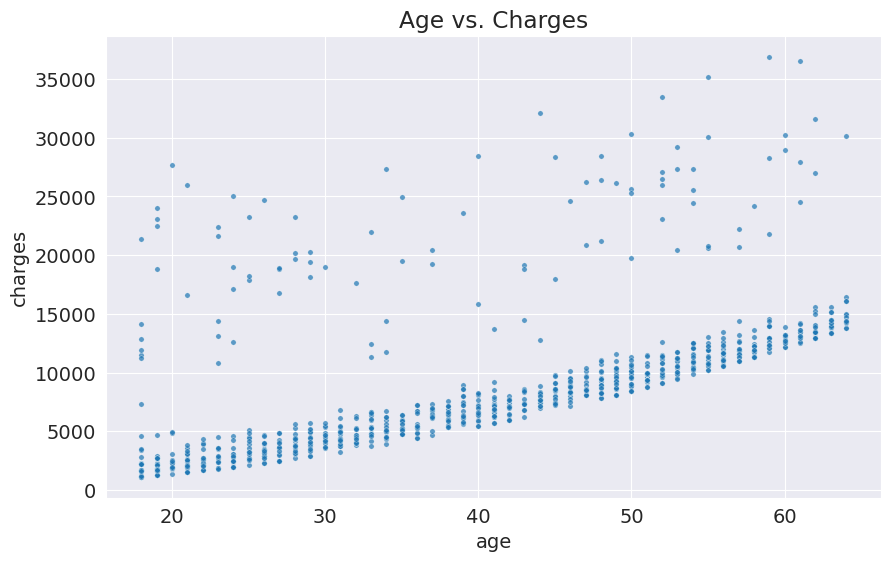

In [53]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);
plt.show()

In [56]:
# The above one is the Actucal Graph.
# Now we create a Model that fit the above line
# The line is create through using linear Regression
# Y=MX+C

In [57]:
def estimate_charges(age, w, b):
    return w*age + b

In [58]:
w = 50
b = 100

In [61]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)

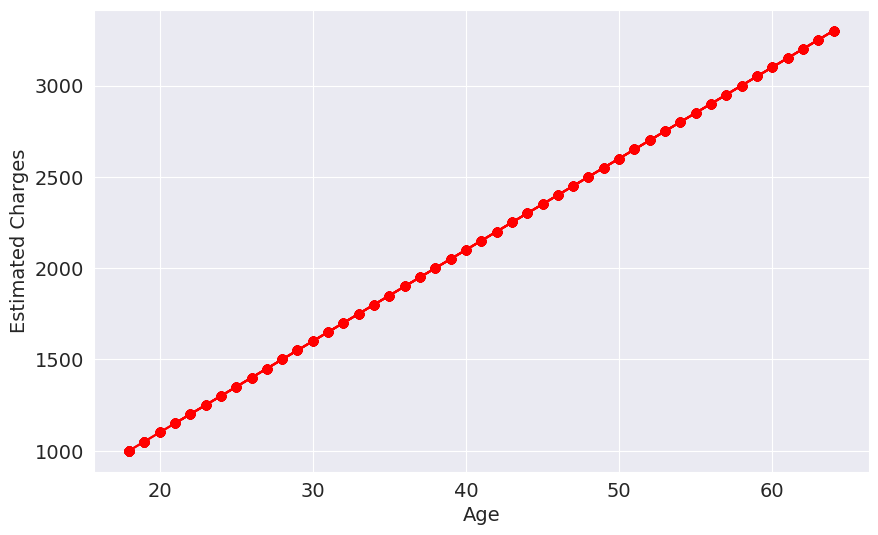

In [63]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.show()

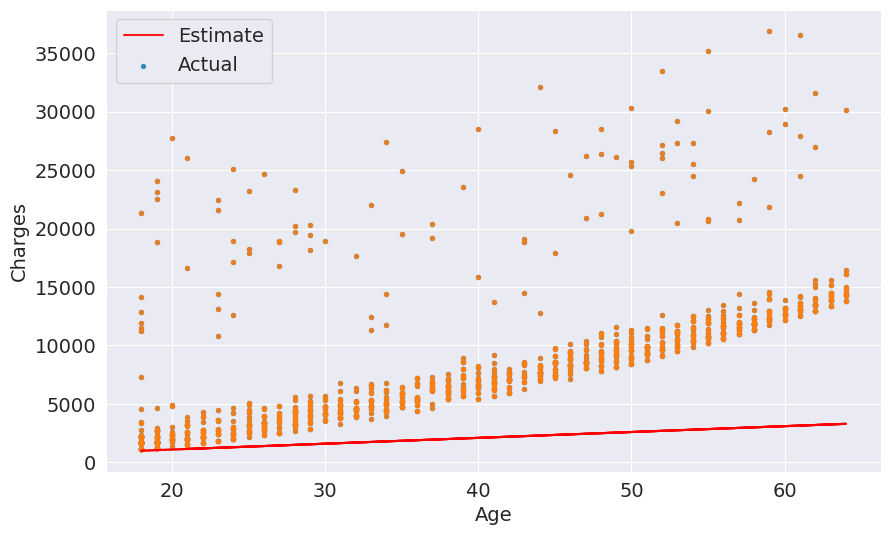

In [65]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges,'r',alpha = 0.9); # Predicted
plt.scatter(ages, target, s=8, alpha=0.8); # Actual
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate','Actual']);
plt.show()

In [66]:
def try_parameters(w,b):
    ages = non_smoker_df.age # Predicted
    target = non_smoker_df.charges # Actual

    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])
    plt.show()

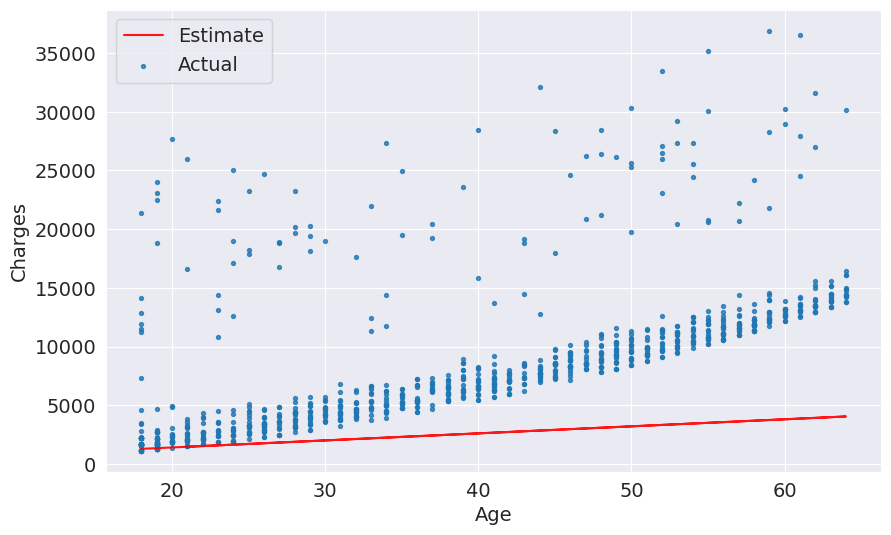

In [68]:
try_parameters(60,200)

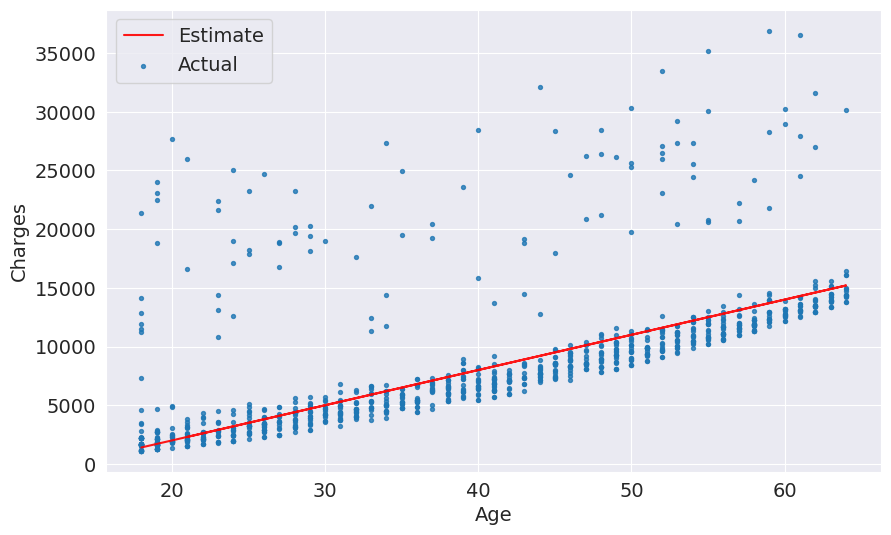

In [71]:
try_parameters(300,-4000)

In [73]:
# We can see Graphically. But We also need Mathematically
# We use Loss Function

In [75]:
import numpy as np

In [76]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [77]:
w= 50
b =100

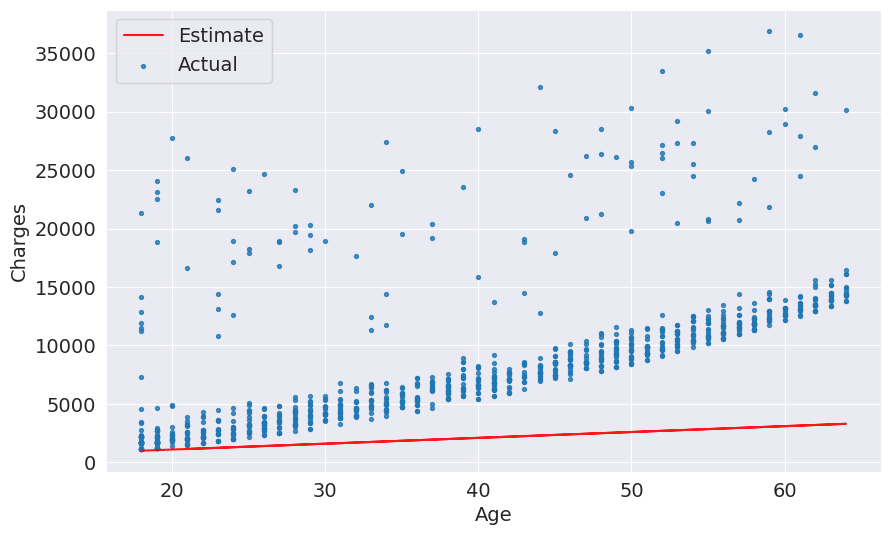

In [78]:
try_parameters(w,b)

In [80]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [81]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [84]:
def try_parameters(w,b):
    target = non_smoker_df.charges
    
    ages = non_smoker_df.age
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha =0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction','Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss:", loss)

    plt.show()

RMSE Loss: 4725.9133994520325


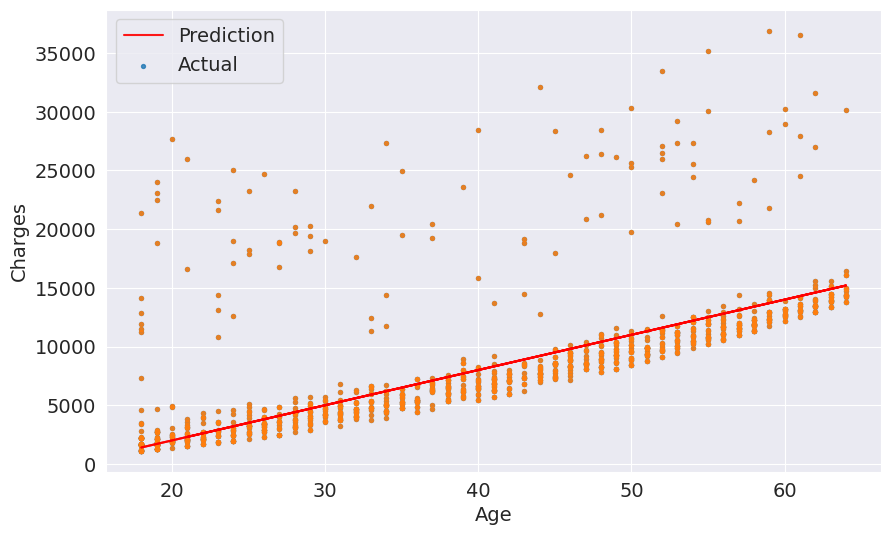

In [85]:
try_parameters(300,-4000)

In [86]:
# Linear Regression using Scikit-learn

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()

In [89]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [90]:
inputs = non_smoker_df[['age']] # X
targets = non_smoker_df.charges # Y
print('inputs.shape : ', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape :  (1064, 1)
targets.shape : (1064,)


In [91]:
#model.fit(X,Y)

model.fit(inputs, targets)

LinearRegression()

In [93]:
model.predict(np.array([[25],[35],[55]]))

/home/sanket-pandey/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4589.80226421,  7262.29139253, 12607.26964915])

In [94]:
predictions = model.predict(inputs)

In [95]:
predictions


array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [96]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [97]:
# W  or M
model.coef_

array([267.24891283])

In [98]:
# b or C
model.intercept_

np.float64(-2091.4205565650827)

RMSE Loss: 4662.505766636395


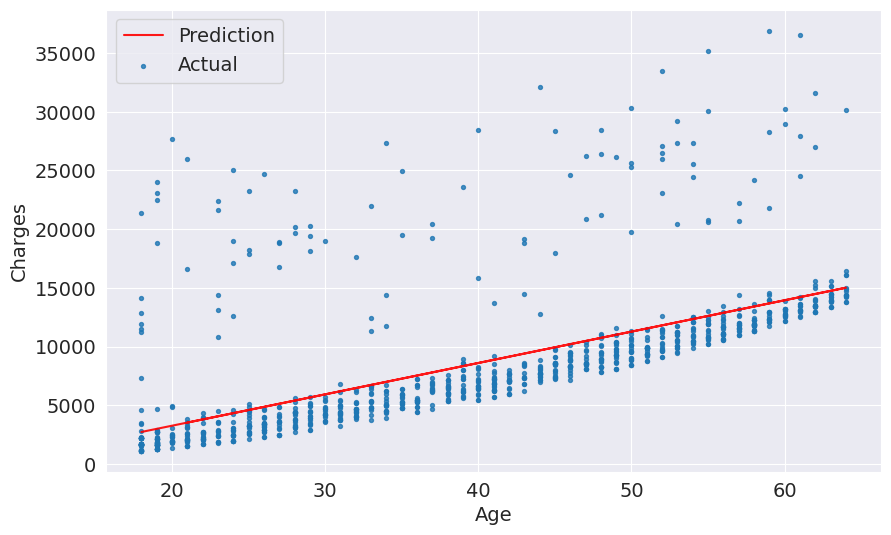

In [99]:
try_parameters(model.coef_, model.intercept_)